# prepare `cellranger multi` run

In [1]:
import pandas as pd
df1 = pd.read_excel(
    '../cr_resources/sirolimus/ProbenSrcX.xlsx',
    usecols = [2, 3, 4, 5, 7, 17, 18, 21]
)
df1.drop(
    index = df1[df1.isna().all(axis = 1)].index,
    inplace = True
)
df1 = df1.loc[df1.staining_HTO.str.startswith('#'), :]
df1

,patient_id,visit_id,sample_material,sample_tissue,sample_date,staining_HTO,sorting_criterium,cell_count
3,P01,V02,sorted_PBMC,Blood,2019-09-24,#0251,living_CD45pos,10000
4,P01,V02,sorted_skin,Skin_L,2019-09-24,#0254,living_CD45pos,3485
5,P01,V02,sorted_skin,Skin_L,2019-09-24,#0254,living_CD45neg,10000
6,P01,V02,sorted_skin,Skin_NL,2019-09-24,#0252,living_CD45pos,1505
7,P01,V02,sorted_skin,Skin_NL,2019-09-24,#0252,living_CD45neg,10000
...,...,...,...,...,...,...,...,...
1467,P15,V02,sorted_PBMC,Blood,2021-06-29,#0251,living_CD45pos,10000
1468,P15,V02,sorted_skin,Skin_L,2021-06-29,#0253,living_CD45pos,20000
1469,P15,V02,sorted_skin,Skin_L,2021-06-29,#0253,living_CD45neg,20000
1470,P15,V02,sorted_skin,Skin_NL,2021-06-29,#0253,living_CD45pos,20000


In [2]:
df2 = pd.read_excel(
    '../cr_resources/sirolimus/Proben SrcX Hashing information 06.21 - 12.21.xlsx',
    usecols = [0, 1, 2, 3, 4, 5, 6, 7]
)
df2.rename(
    columns = {
        'hashtag': 'staining_HTO'
    },
    inplace = True
)
df2 = df2.loc[
    :, 
    ['patient_id', 'visit_id', 'sample_material', 'sample_tissue', 'sample_date', 'staining_HTO', 'sorting_criterium', 'cell_count']
]
df2.loc[:, 'staining_HTO'] = df2.staining_HTO.apply(
    lambda x: f'#025{x}'
)
df2

,patient_id,visit_id,sample_material,sample_tissue,sample_date,staining_HTO,sorting_criterium,cell_count
0,P12,V15,PBMC,blood,2021-08-24,#0251,living_CD45pos,10000
1,P12,V15,sorted_skin,skinL,2021-08-24,#0253,living_CD45pos,20000
2,P12,V15,sorted_skin,skinL,2021-08-24,#0253,living_CD45neg,20000
3,P12,V14,PBMC,blood,2021-06-16,#0251,living_CD45pos,10000
4,P12,V14,sorted_skin,skinL,2021-06-16,#0253,living_CD45pos,20000
5,P12,V14,sorted_skin,skinL,2021-06-16,#0253,living_CD45neg,20000
6,P13,V15,PBMC,blood,2021-08-30,#0251,living_CD45pos,10000
7,P13,V15,sorted_skin,skinL,2021-08-30,#0253,living_CD45pos,2209
8,P13,V15,sorted_skin,skinL,2021-08-30,#0253,living_CD45neg,20000
9,P13,V14,PBMC,blood,2021-07-05,#0251,living_CD45pos,10000


In [3]:
df = pd.concat([df1, df2])
old_name_map = {}
for pid in ['P15', 'P17']:
    for old_vid, new_vid in zip(['V02', 'V10', 'V11'], ['V06', 'V14', 'V15']):
        old_name_map['_'.join([pid, new_vid])] = '_'.join([pid, old_vid])
        df.loc[
            (df.patient_id == pid) & (df.visit_id == old_vid),
            'visit_id'
        ] = new_vid

In [4]:
# samples removed due to dropout or missing timepoints
remove = ['P01', 'P06', 'P07', 'P09', 'P10', 'P11']
systemic = ['V02', 'V06', 'V14', 'V15']
df = df.loc[
    ~df.patient_id.isin(remove) & df.visit_id.isin(systemic),
    :
]
df.sort_values(
    by = ['patient_id', 'visit_id'],
    inplace = True
)
df.reset_index(
    drop = True,
    inplace = True
)
df

,patient_id,visit_id,sample_material,sample_tissue,sample_date,staining_HTO,sorting_criterium,cell_count
0,P02,V02,sorted_PBMC,Blood,2019-09-25,#0251,living_CD45pos,10000
1,P02,V02,sorted_skin,Skin_L,2019-09-25,#0254,living_CD45pos,10000
2,P02,V02,sorted_skin,Skin_L,2019-09-25,#0254,living_CD45neg,10000
3,P02,V02,sorted_skin,Skin_NL,2019-09-25,#0252,living_CD45pos,3009
4,P02,V02,sorted_skin,Skin_NL,2019-09-25,#0252,living_CD45neg,9560
...,...,...,...,...,...,...,...,...
139,P17,V14,sorted_skin,skinL,2021-12-15,#0254,living_CD45pos,3590
140,P17,V14,sorted_skin,skinL,2021-12-15,#0254,living_CD45neg,20000
141,P17,V15,PBMC,blood,2021-12-15,#0254,living_CD45pos,10000
142,P17,V15,sorted_skin,skinL,2021-12-15,#0252,living_CD45pos,5775


In [5]:
df.groupby('patient_id').count()

,visit_id,sample_material,sample_tissue,sample_date,staining_HTO,sorting_criterium,cell_count
patient_id,,,,,,,
P02,16,16,16,16,16,16,16
P03,16,16,16,16,16,16,16
P04,16,16,16,16,16,16,16
P05,16,16,16,16,16,16,16
P08,14,14,14,14,14,14,14
P12,14,14,14,14,14,14,14
P13,14,14,14,14,14,14,14
P14,14,14,14,14,14,14,14
P15,13,13,13,13,13,13,13


In [6]:
df.loc[df.patient_id == 'P15']

,patient_id,visit_id,sample_material,sample_tissue,sample_date,staining_HTO,sorting_criterium,cell_count
120,P15,V06,sorted_PBMC,Blood,2021-06-29,#0251,living_CD45pos,10000
121,P15,V06,sorted_skin,Skin_L,2021-06-29,#0253,living_CD45pos,20000
122,P15,V06,sorted_skin,Skin_L,2021-06-29,#0253,living_CD45neg,20000
123,P15,V06,sorted_skin,Skin_NL,2021-06-29,#0253,living_CD45pos,20000
124,P15,V06,sorted_skin,Skin_NL,2021-06-29,#0253,living_CD45neg,20000
125,P15,V14,PBMC,blood,2021-11-19,#0251,living_CD45pos,10000
126,P15,V14,sorted_skin,skinL1,2021-11-19,#0253,living_CD45pos,15000
127,P15,V14,sorted_skin,skinL1,2021-11-19,#0253,living_CD45neg,10000
128,P15,V14,sorted_skin,skinL2,2021-11-19,#0252,living_CD45pos,10000
129,P15,V14,sorted_skin,skinL2,2021-11-19,#0252,living_CD45neg,10000


In [7]:
rename = {
    'skinL': 'Skin_L',
    'skinL1': 'Skin_L_Knee',
    'skinL2': 'Skin_L_Ankle',
    'skinNL': 'Skin_NL',
    'blood': 'Blood'
}
df.loc[:, 'sample_tissue'] = df.sample_tissue.apply(
    lambda x: rename[x] if x in rename else x
)
df.loc[
    (df.patient_id == 'P15') & (df.visit_id == 'V06') & (df.sample_tissue == 'Skin_NL'),
    'staining_HTO'
] = '#0252'

# necessary since cellranger does not like # in the names
df.loc[:, 'staining_HTO'] = df.staining_HTO.apply(
    lambda x: x.replace('#', 'AB')
)
df

,patient_id,visit_id,sample_material,sample_tissue,sample_date,staining_HTO,sorting_criterium,cell_count
0,P02,V02,sorted_PBMC,Blood,2019-09-25,AB0251,living_CD45pos,10000
1,P02,V02,sorted_skin,Skin_L,2019-09-25,AB0254,living_CD45pos,10000
2,P02,V02,sorted_skin,Skin_L,2019-09-25,AB0254,living_CD45neg,10000
3,P02,V02,sorted_skin,Skin_NL,2019-09-25,AB0252,living_CD45pos,3009
4,P02,V02,sorted_skin,Skin_NL,2019-09-25,AB0252,living_CD45neg,9560
...,...,...,...,...,...,...,...,...
139,P17,V14,sorted_skin,Skin_L,2021-12-15,AB0254,living_CD45pos,3590
140,P17,V14,sorted_skin,Skin_L,2021-12-15,AB0254,living_CD45neg,20000
141,P17,V15,PBMC,Blood,2021-12-15,AB0254,living_CD45pos,10000
142,P17,V15,sorted_skin,Skin_L,2021-12-15,AB0252,living_CD45pos,5775


In [8]:
df.visit_id.unique()

array(['V02', 'V06', 'V14', 'V15'], dtype=object)

In [9]:
hto_cmo_ref = {}
with open('../cr_resources/hto_cmo_ref_totalseqA.csv') as f:
    header = f.readline()
    for line in f:
        line = line.split(',')
        k = line[0]
        line[1] = '{name}'
        hto_cmo_ref[k] = ','.join(line)
        print(','.join(line))
        
hto_cmo_ref, header

AB0251,{name},R2,5P(BC),GTCAACTCTTTAGCG,Multiplexing Capture

AB0252,{name},R2,5P(BC),TGATGGCCTATTGGG,Multiplexing Capture

AB0253,{name},R2,5P(BC),TTCCGCCTCTCTTTG,Multiplexing Capture

AB0254,{name},R2,5P(BC),AGTAAGTTCAGCGTA,Multiplexing Capture



({'AB0251': 'AB0251,{name},R2,5P(BC),GTCAACTCTTTAGCG,Multiplexing Capture\n',
  'AB0252': 'AB0252,{name},R2,5P(BC),TGATGGCCTATTGGG,Multiplexing Capture\n',
  'AB0253': 'AB0253,{name},R2,5P(BC),TTCCGCCTCTCTTTG,Multiplexing Capture\n',
  'AB0254': 'AB0254,{name},R2,5P(BC),AGTAAGTTCAGCGTA,Multiplexing Capture\n'},
 'id,name,read,pattern,sequence,feature_type\n')

In [10]:
with open('../cr_resources/hto_demux_config.conf') as f:
    config_file = f.read()
config_file

'[gene-expression]\nreference,/resources/references/10x/refdata-cellranger-GRCh38-3.0.0\ncmo-set,/groups/pavri/bioinfo/daniel/scStary/cr_resources/{resource_dir}/hto_cmo_ref_{hto_cmo_ref_id}.csv\n\n[libraries]\nfastq_id,fastqs,feature_types\n{sample_name}_gex,{gex_fastq_prefix},Gene Expression\n{sample_name}_mux,{mux_fastq_prefix},Multiplexing Capture\n\n[samples]\nsample_id,cmo_ids\n'

In [11]:
old_name_map

{'P15_V06': 'P15_V02',
 'P15_V14': 'P15_V10',
 'P15_V15': 'P15_V11',
 'P17_V06': 'P17_V02',
 'P17_V14': 'P17_V10',
 'P17_V15': 'P17_V11'}

In [12]:
cmo_refs_sample = {}
for pvid, sample_df in df.groupby(['patient_id', 'visit_id']):
    tmp = sample_df.loc[
        :,
        ['staining_HTO', 'sample_tissue']
    ].drop_duplicates()
    k = ','.join(tmp.apply(lambda x: ':'.join(x), axis = 1))
    pvid = '_'.join(pvid)
    if not k in cmo_refs_sample:
        cmo_refs_sample[k] = set([pvid])
    
    else:
        cmo_refs_sample[k].add(pvid)

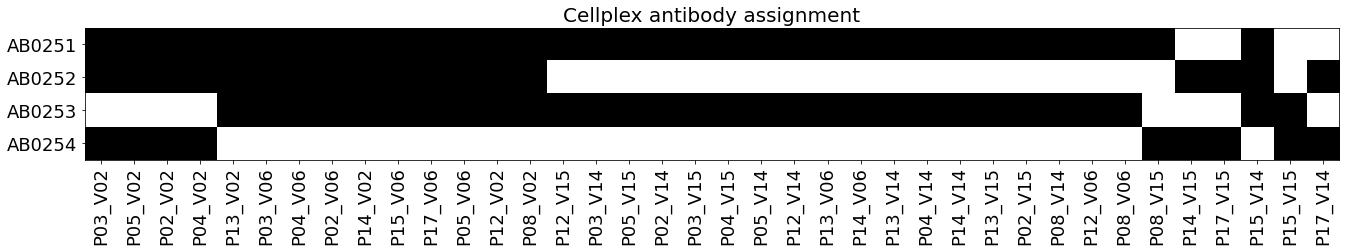

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
a = np.zeros((4, 38))
idx = {
    'AB0251': 0,
    'AB0252': 1,
    'AB0253': 2,
    'AB0254': 3
}
samples = []
j = 0
for k, v in cmo_refs_sample.items():
    for sample in v:
        samples.append(sample)
        for cmo in k.split(','):
            a[idx[cmo.split(':')[0]], j] = 1
        
        j += 1
        
ax.imshow(a, vmin = 0, vmax = 1, cmap = 'Greys')
ax.set_yticks(range(4))
ax.set_yticklabels([k for k in idx], fontsize = 18)
ax.set_xticks(range(len(samples)))
ax.set_xticklabels(samples, rotation = 90, fontsize = 18)
ax.set_title('Cellplex antibody assignment', fontsize = 20)
fig.set_figheight(3)
fig.set_figwidth(20)
fig.tight_layout()

In [12]:
import glob
import os

file_assignments = []
resource_dir = 'sirolimus'
for i, (k, v) in enumerate(cmo_refs_sample.items()):
    cmos = k.split(',')
    hto_cmo_ref_content = header
    config_content = config_file
    for cmo, name in [cmo.split(':') for cmo in cmos]:
        hto_cmo_ref_content += hto_cmo_ref[cmo].format(name = name)
        config_content += ','.join([name, cmo]) + '\n'
    
    hto_cmo_ref_file = f'hto_cmo_ref_{i}.csv'
    with open(f'../cr_resources/{resource_dir}/{hto_cmo_ref_file}', 'w') as f:
        f.write(hto_cmo_ref_content)
        
    for pvid in v:
        old_pvid = old_name_map[pvid] if pvid in old_name_map else pvid
        suffix = ''
        if pvid == 'P15_V14':
            suffix = '383'
        
        elif pvid == 'P15_V15':
            suffix = '392'
            
        for s in [pvid, old_pvid]:
            gex_data = glob.glob(f'/scratch/daniel.malzl/SRCX/*{s}_TK{suffix}*')
            mux_data = glob.glob(f'/scratch/daniel.malzl/SRCX/*{s}_HTO_TK{suffix}*')
            
            if gex_data and mux_data:
                break
        
        data_paths = {}
        sample_name = f'SrcX_{pvid}'
        for data_type, data_files in zip(
            ['gex', 'mux'],
            [gex_data, mux_data]
        ):
            directory = f'/scratch/daniel.malzl/srcx_data/{sample_name}_{data_type}'
            if not os.path.exists(directory):
                os.mkdir(directory)
            
            data_paths[data_type] = directory
                
            for source in data_files:
                basename = os.path.basename(source)
                suffix = '_'.join(basename.split('_')[-4:])
                destination = f'{directory}/{sample_name}_{data_type}_{suffix}'
                
                if not os.path.exists(destination):
                    os.symlink(
                        source,
                        destination
                    )
        
        sample_config_content = config_content.format(
            resource_dir = resource_dir,
            hto_cmo_ref_id = i,
            sample_name = sample_name,
            gex_fastq_prefix = data_paths['gex'],
            mux_fastq_prefix = data_paths['mux']
        )
        config_file_name = f'hto_demux_config_{pvid}.conf'
        with open(f'../cr_resources/{resource_dir}/{config_file_name}', 'w') as f:
            f.write(sample_config_content)
            
        file_assignments.append(
            [pvid, hto_cmo_ref_file, config_file_name]
        )

with open(f'../cr_resources/{resource_dir}/sample_hto_demux.csv', 'w') as f:
    f.write(
        '\n'.join(
            [','.join(l) for l in file_assignments]
        )
    )
file_assignments

[['P03_V02', 'hto_cmo_ref_0.csv', 'hto_demux_config_P03_V02.conf'],
 ['P02_V02', 'hto_cmo_ref_0.csv', 'hto_demux_config_P02_V02.conf'],
 ['P05_V02', 'hto_cmo_ref_0.csv', 'hto_demux_config_P05_V02.conf'],
 ['P04_V02', 'hto_cmo_ref_0.csv', 'hto_demux_config_P04_V02.conf'],
 ['P13_V02', 'hto_cmo_ref_1.csv', 'hto_demux_config_P13_V02.conf'],
 ['P12_V02', 'hto_cmo_ref_1.csv', 'hto_demux_config_P12_V02.conf'],
 ['P04_V06', 'hto_cmo_ref_1.csv', 'hto_demux_config_P04_V06.conf'],
 ['P02_V06', 'hto_cmo_ref_1.csv', 'hto_demux_config_P02_V06.conf'],
 ['P05_V06', 'hto_cmo_ref_1.csv', 'hto_demux_config_P05_V06.conf'],
 ['P03_V06', 'hto_cmo_ref_1.csv', 'hto_demux_config_P03_V06.conf'],
 ['P15_V06', 'hto_cmo_ref_1.csv', 'hto_demux_config_P15_V06.conf'],
 ['P17_V06', 'hto_cmo_ref_1.csv', 'hto_demux_config_P17_V06.conf'],
 ['P08_V02', 'hto_cmo_ref_1.csv', 'hto_demux_config_P08_V02.conf'],
 ['P14_V02', 'hto_cmo_ref_1.csv', 'hto_demux_config_P14_V02.conf'],
 ['P03_V15', 'hto_cmo_ref_2.csv', 'hto_demux_con

In [64]:
len(file_assignments)

38

# aggregate data
aggr did not work for whatever reason but we anyway have the filtered data so we do it manually using scanpy. run after `cellranger multi`

In [13]:
import scanpy as sc
import anndata as ad
# path = '/scratch/daniel.malzl/cellranger/{sample_id}/outs/per_sample_outs/{sample_part}/count/sample_molecule_info.h5'
path = '/scratch/daniel.malzl/cr/{sample_id}/outs/per_sample_outs/{sample_part}/count/sample_feature_bc_matrix.h5'
timepoint = {
    'V02': 'baseline_general',
    'V06': 'baseline_systemic',
    'V14': 'end_systemic',
    'V15': '2_months_washout_systemic'
}
# aggr_csv = []
adatas = []
i = 0
for (pid, vid), group in df.groupby(['patient_id', 'visit_id']):
    for tissue in group.sample_tissue.unique():
        print(pid, vid, tissue)
        try:
            adata = sc.read_10x_h5(
                path.format(
                    sample_id = '_'.join([pid, vid]),
                    sample_part = tissue
                )
            )
        
        except ValueError as e:
            print('no counts for this sample')
            print(e)
            continue
        
        adata.var_names_make_unique()
        for col, val in zip(
            ['sample_id', 'patient_id', 'visit_id', 'tissue', 'timepoint'],
            ['_'.join([pid, vid, tissue]), pid, vid, tissue, timepoint[vid]]
        ):
            adata.obs[col] = val
            
        adata.obs_names = [f'{idx}{i}' for idx in adata.obs_names]
        adata.X = adata.X.astype('int')
        adatas.append(adata)
        i += 1
        
        # aggr_csv.append(
        #     [
        #         '_'.join([pid, vid, tissue]), 
        #         path.format(
        #             sample_id = '_'.join([pid, vid]),
        #             sample_part = tissue
        #         ),
        #         pid,
        #         vid,
        #         tissue,
        #         timepoint[vid]
        #     ]
        # )

# aggr_csv = pd.DataFrame(
#     aggr_csv,
#     columns = ['sample_id', 'molecule_h5', 'patient_id', 'visit_id', 'tissue', 'timepoint']
# )
# aggr_csv.to_csv(
#     '../cr_resources/aggr_multi.csv',
#     index = False
# )
# aggr_csv
adata = ad.concat(adatas)
adata

P02 V02 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P02 V02 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P02 V02 Skin_NL


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P02 V06 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P02 V06 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P02 V06 Skin_NL


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P02 V14 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P02 V14 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P02 V15 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P02 V15 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P03 V02 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P03 V02 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P03 V02 Skin_NL
P03 V06 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P03 V06 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P03 V06 Skin_NL
P03 V14 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P03 V14 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P03 V15 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P03 V15 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P04 V02 Blood
no counts for this sample
Empty datasets cannot be sliced
P04 V02 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P04 V02 Skin_NL
no counts for this sample
Empty datasets cannot be sliced
P04 V06 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P04 V06 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P04 V06 Skin_NL


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P04 V14 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P04 V14 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P04 V15 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P04 V15 Skin_L
P05 V02 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P05 V02 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P05 V02 Skin_NL
P05 V06 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P05 V06 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P05 V06 Skin_NL
P05 V14 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P05 V14 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P05 V15 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P05 V15 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P08 V02 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P08 V02 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P08 V02 Skin_NL


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P08 V06 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P08 V06 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P08 V14 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P08 V14 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P08 V15 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P08 V15 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P12 V02 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P12 V02 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P12 V02 Skin_NL


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P12 V06 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P12 V06 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P12 V14 Blood
P12 V14 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P12 V15 Blood
P12 V15 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P13 V02 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P13 V02 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P13 V02 Skin_NL


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P13 V06 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P13 V06 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P13 V14 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P13 V14 Skin_L
P13 V15 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P13 V15 Skin_L
P14 V02 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P14 V02 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P14 V02 Skin_NL
P14 V06 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P14 V06 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P14 V14 Blood
P14 V14 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P14 V15 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P14 V15 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P15 V06 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P15 V06 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P15 V06 Skin_NL
P15 V14 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P15 V14 Skin_L_Knee


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P15 V14 Skin_L_Ankle
P15 V15 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P15 V15 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P17 V06 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P17 V06 Skin_L
P17 V06 Skin_NL


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P17 V14 Blood
P17 V14 Skin_L
P17 V15 Blood


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


P17 V15 Skin_L


/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 208443 × 33538
    obs: 'sample_id', 'patient_id', 'visit_id', 'tissue', 'timepoint'

In [14]:
adata.write(
    '../raw/srcx_sirolimus.h5ad'
)